<a href="https://colab.research.google.com/github/Nikhil768692/machine_learning/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Modules

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset


In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SER/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]

['/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/YAF_disgust/YAF_dab_disgust.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav',
 '/content/drive/MyDrive/SER/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav']

In [10]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/SER/TESS Toronto emotio...,disgust
1,/content/drive/MyDrive/SER/TESS Toronto emotio...,disgust
2,/content/drive/MyDrive/SER/TESS Toronto emotio...,disgust
3,/content/drive/MyDrive/SER/TESS Toronto emotio...,disgust
4,/content/drive/MyDrive/SER/TESS Toronto emotio...,disgust


In [12]:
df['label'].value_counts()

,count
label,
disgust,400
sad,400
neutral,400
ps,400
angry,400
happy,400
fear,400


### Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

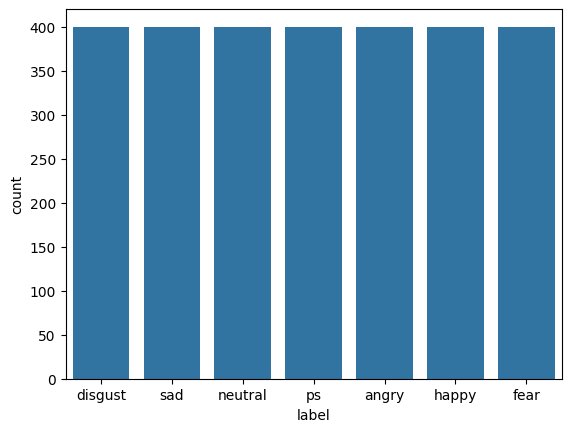

In [13]:
sns.countplot(data=df, x='label')

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

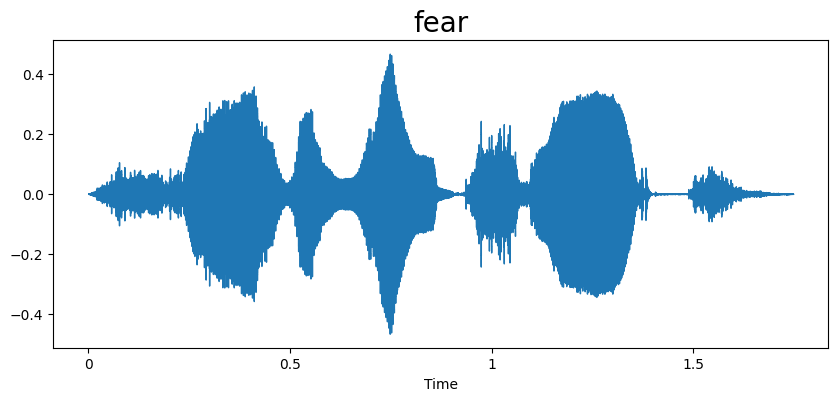

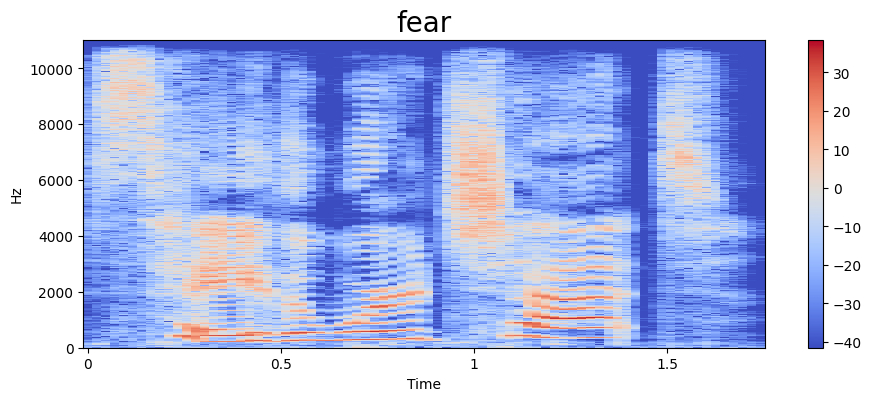

In [15]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

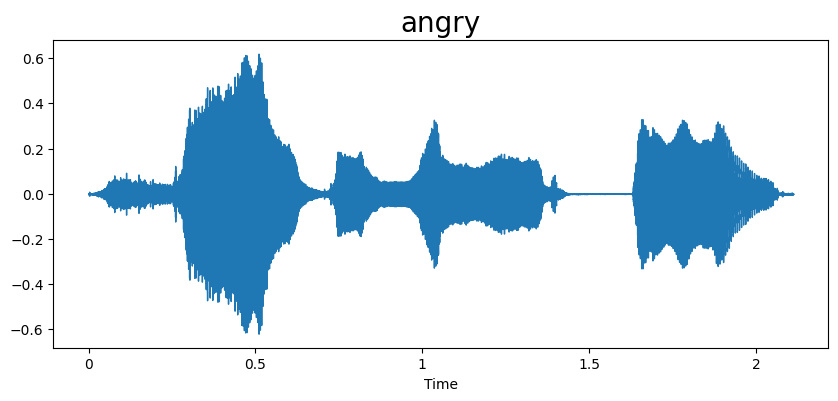

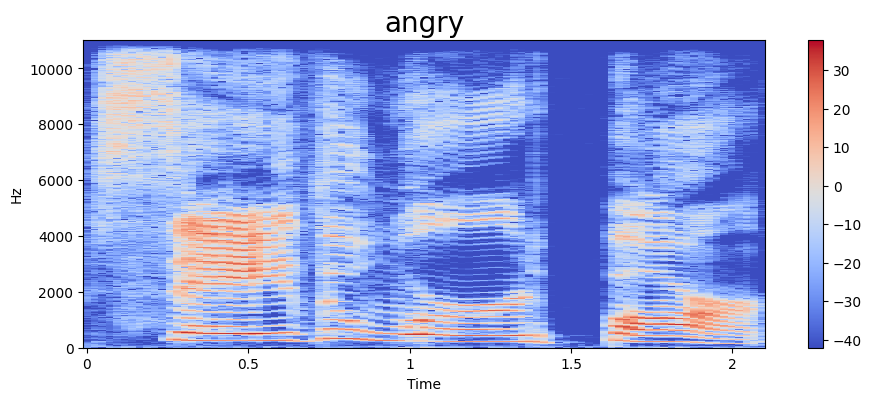

In [17]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

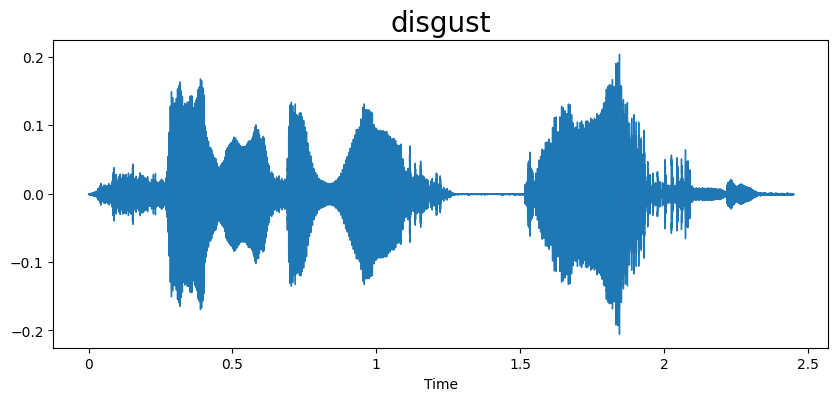

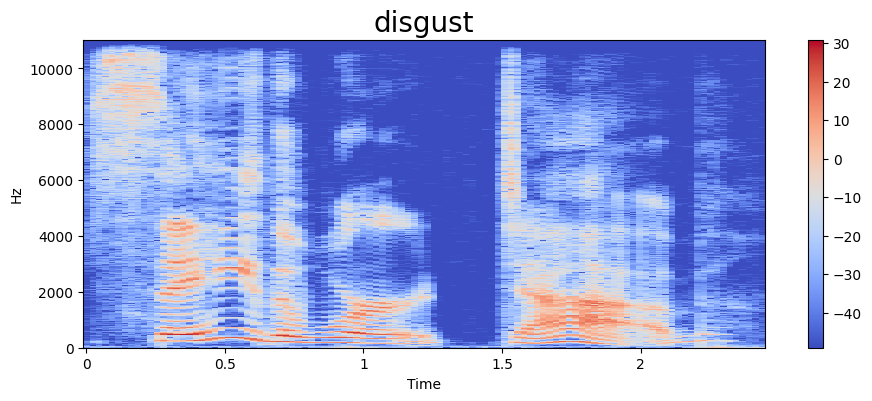

In [18]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


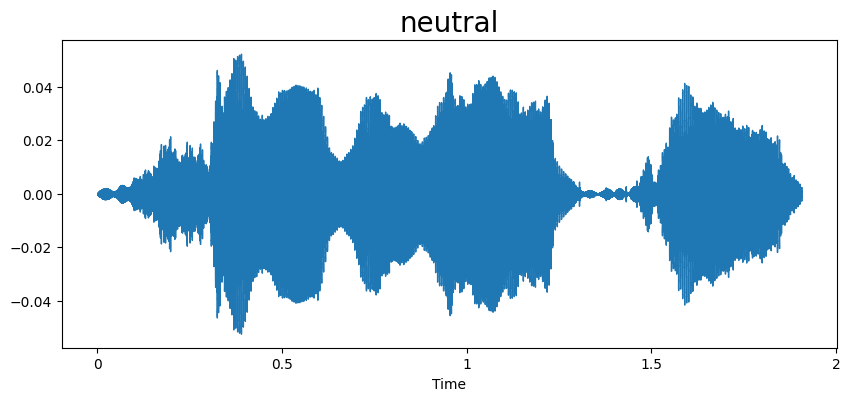

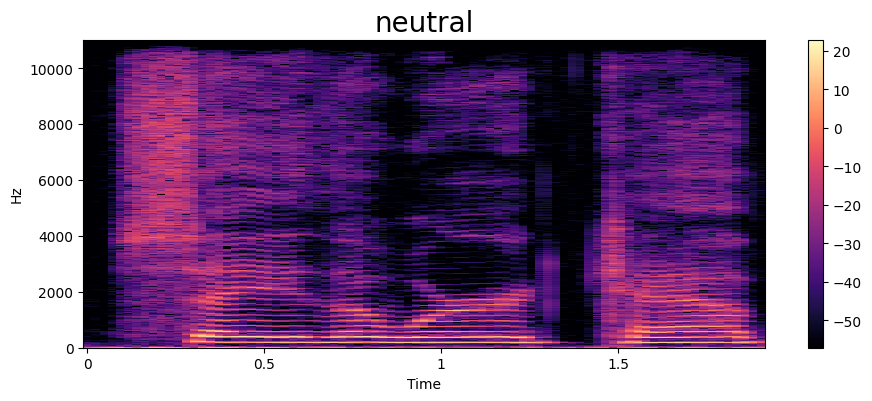

In [19]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

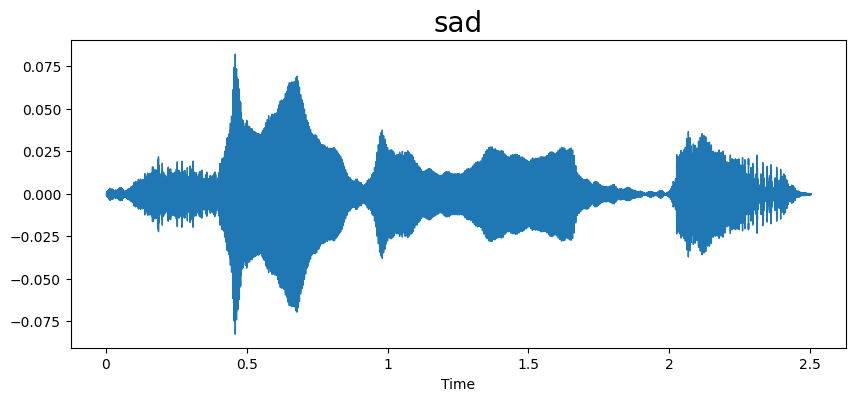

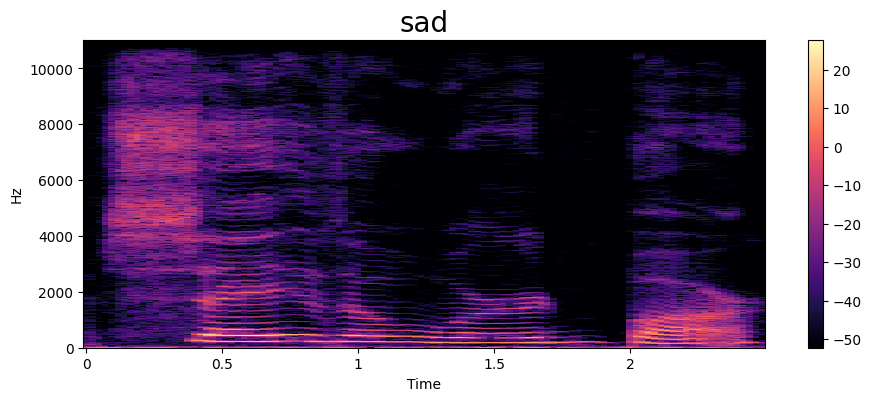

In [20]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

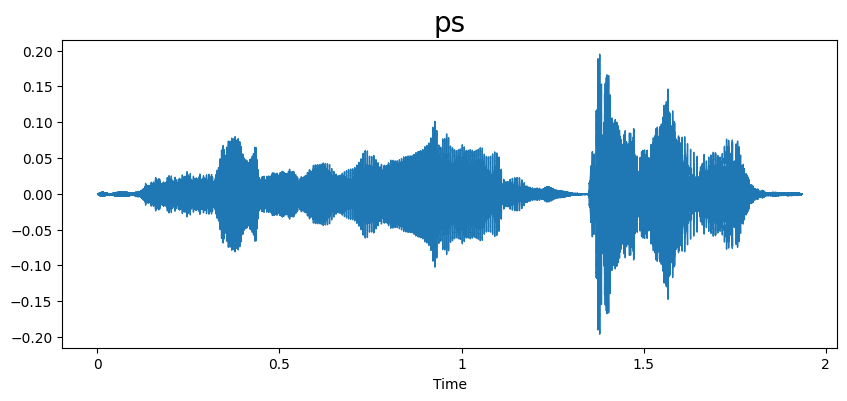

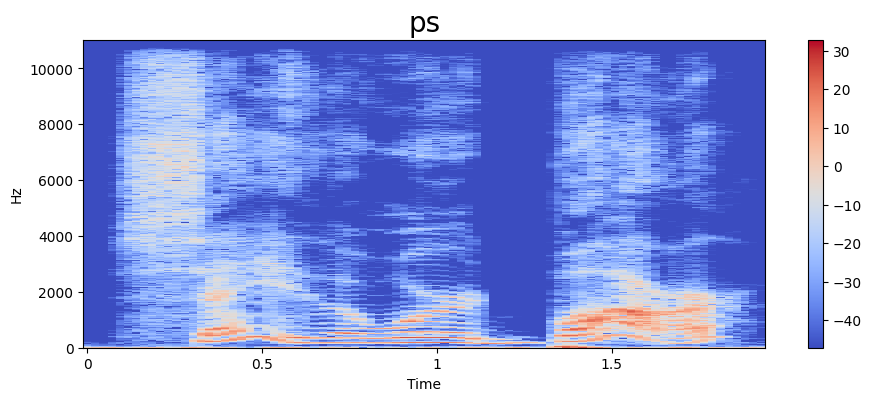

In [21]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


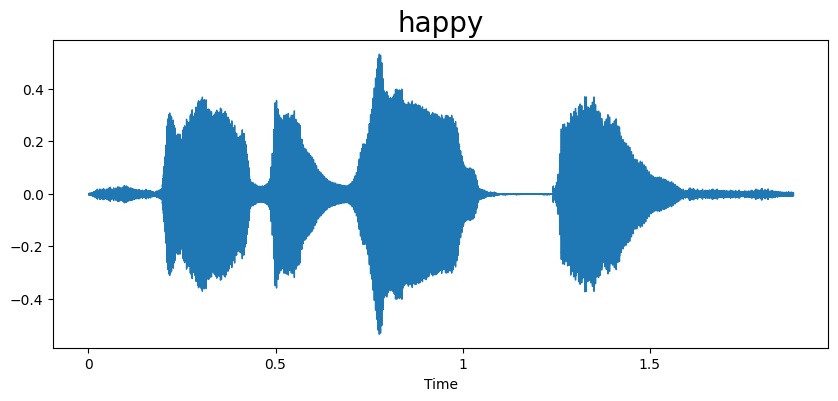

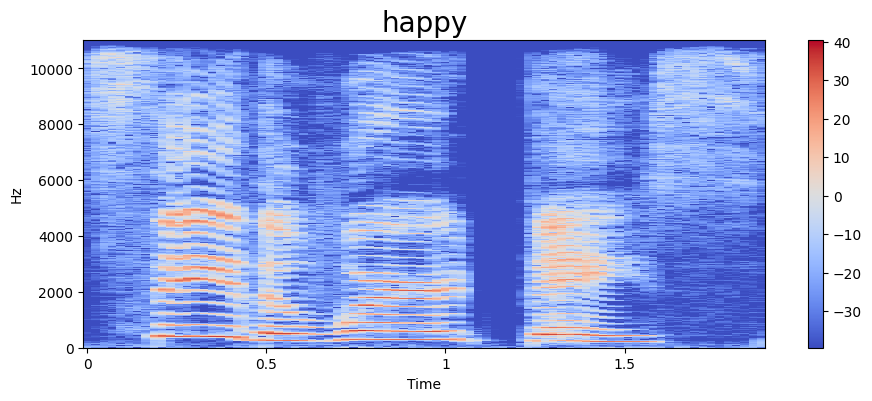

In [22]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Feature Extraction

In [23]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [24]:
extract_mfcc(df['speech'][0])

array([-4.10394440e+02,  1.05531944e+02, -1.93028889e+01,  4.76078701e+00,
       -1.40417652e+01,  1.07582626e+01, -8.77879333e+00, -1.78713589e+01,
       -5.08318615e+00, -1.28387392e+00, -7.48457575e+00, -4.09810156e-01,
       -1.25945721e+01,  7.02461958e-01, -4.78564769e-01, -5.71650219e+00,
       -3.73898125e+00, -1.26069233e-01, -4.09254551e+00, -2.79404211e+00,
        1.92382768e-01, -5.77405262e+00, -4.06360388e+00,  1.06858766e+00,
       -5.40157032e+00,  4.47997451e-01, -4.69313765e+00,  1.79689825e+00,
       -2.80519748e+00,  2.83761239e+00,  2.05987900e-01,  3.52431917e+00,
        2.09167436e-01,  2.64661980e+00,  3.50584078e+00,  3.37329173e+00,
        5.31694269e+00,  5.39749956e+00,  4.98996878e+00,  6.27851868e+00],
      dtype=float32)

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

,speech
0,"[-410.39444, 105.531944, -19.302889, 4.760787,..."
1,"[-385.07043, 114.565315, -16.425419, 12.502725..."
2,"[-409.6209, 105.88283, -21.932735, 8.138542, -..."
3,"[-412.17133, 80.672745, -3.158254, 23.655542, ..."
4,"[-446.36795, 73.7893, 1.5521731, 40.626892, -8..."
...,...
2795,"[-499.05136, 121.57547, 29.501469, -14.094628,..."
2796,"[-463.48773, 99.21175, 25.25579, 5.409088, 17...."
2797,"[-447.27066, 134.22261, 25.443525, -13.195233,..."
2798,"[-453.16788, 109.90355, 26.602047, 1.9839427, ..."


In [29]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [30]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [32]:
y = y.toarray()

In [33]:
y.shape

(2800, 7)

### CREATE A LSTM Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.3899 - loss: 1.5109 - val_accuracy: 0.3357 - val_loss: 3.2666
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.8575 - loss: 0.3991 - val_accuracy: 0.4821 - val_loss: 2.7162
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9474 - loss: 0.1849 - val_accuracy: 0.3679 - val_loss: 3.7885
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.9682 - loss: 0.1153 - val_accuracy: 0.2643 - val_loss: 3.8437
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9453 - loss: 0.1514 - val_accuracy: 0.4179 - val_loss: 3.5527
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9784 - loss: 0.0696 - val_accuracy: 0.3625 - val_loss: 3.8931
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9863 - loss: 0.0490 - val_accuracy: 0.4518 - val_loss: 3.6538
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9729 - loss: 0.0843 - val_accuracy:

In [36]:
# best val accuracy:
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

### Plot the results

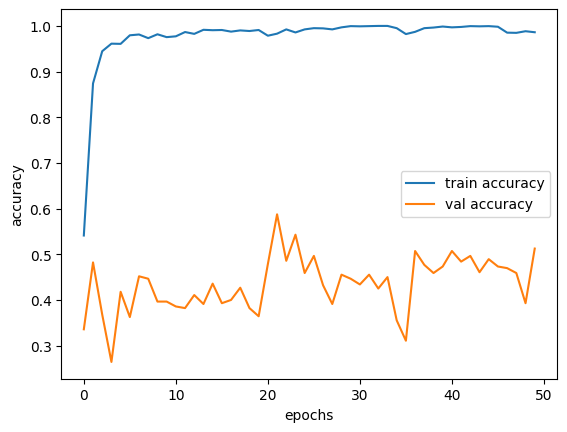

In [37]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

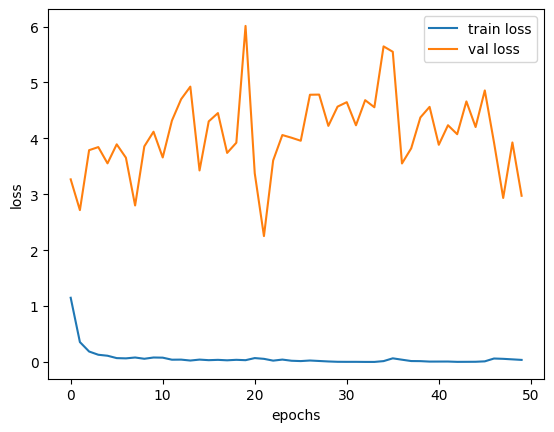

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()